In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import time

In [36]:
%%time
mnist = fetch_openml("mnist_784")

CPU times: user 25.6 s, sys: 945 ms, total: 26.6 s
Wall time: 27.7 s


In [37]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [6]:
print(type(mnist.data), type(mnist.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
images = mnist.data
targets = mnist.target
labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
data_df = pd.DataFrame(images)
label_df = pd.DataFrame(targets)

In [9]:
# data_df

In [10]:
# label_df

In [11]:
# standardization
scaler = StandardScaler() # mean : 0, std : 1
# scaler = RobustScaler() # median : 0, IQR : 1
scaler.fit(images)
X_scaled = scaler.transform(images)

In [12]:
# stratify sampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, test_size=0.3, random_state=123, stratify=targets)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=123, stratify=targets)

In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(49000, 784) (21000, 784)
(49000,) (21000,)


In [14]:
print(type(y_train))

<class 'numpy.ndarray'>


In [20]:
def count_target(target):
    for i in range(10):
        unique, counts = np.unique(target, return_counts=True)
        
    return counts

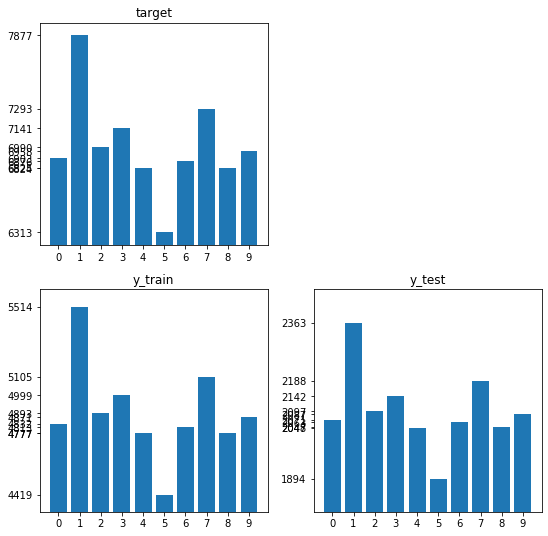

In [34]:
# distribution of numbers after stratify sampling
count_y_train = count_target(y_train)
count_y_valid = count_target(y_valid)
count_y = count_target(targets)

plt.figure(figsize=(9,9))

plt.subplot(221)
plt.bar(labels, count_y)
plt.title("target")
plt.xticks(labels, labels)
plt.yticks(count_y)
plt.ylim(min(count_y)-100, max(count_y)+100)

plt.subplot(223)
plt.bar(labels, count_y_train)
plt.title("y_train")
plt.xticks(labels, labels)
plt.yticks(count_y_train)
plt.ylim(min(count_y_train)-100, max(count_y_train)+100)

plt.subplot(224)
plt.bar(labels, count_y_valid)
plt.title("y_test")
plt.xticks(labels, labels)
plt.yticks(count_y_valid)
plt.ylim(min(count_y_valid)-100, max(count_y_valid)+100)

plt.show()

In [13]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

In [14]:
# X_train_df

In [15]:
# y_train_df

# SVM - linear kernel

In [17]:
C = [1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001]

In [19]:
def run(X_train, y_train, C):
    """
    SVC : C-Support Vector Classification.
    GridSearchCV : Exhaustive search over specified parameter values for an estimator
                   estimator : SVM Classifier
                   parameters : linear kernel, C
                   scoring : f1
                   cross-validation : 10 times
    """
    
    parameters = {'kernel':['linear'], 'C':C}
    
    svc = SVC()
    clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring='f1', cv=10, n_jobs=-1)
    %time clf.fit(X_train, y_train)

    best_param = clf.best_params_
    best_score = clf.best_score_
    
    print(clf.cv_results_["cv_validation_scores"]) # every result of cross-validation
    print(clf.cv_results_["mean_test_score"]) # mean of result of cross-validation
    print(best_param " : \n", best_score)
    
    
#     print(classification_report(y_test, y_pred, target_names=target_names))
    
#     # classify
#     predict_start = time.time()
#     y_pred_svc = clf[i].predict(X_test)
#     predict_end = time.time()
#     print("predict time : %2f" %(predict_end - predict_start))
    
#     acc = metrics.accuracy_score(y_test, y_pred_svc)
#     print("Accuracy: %2f" %acc)
#     print("\n")

    return best_param

In [ ]:
def test(X_train, X_test, y_train, y_test, C):
    clf = SVC(kernel="linear", C=C).fit(X_train, y_train)
    %time y_pred = clf.predict(X_test)
#     target_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    cv_report = classification_report(y_test, y_pred, target_name=target_name)

In [21]:
%%time
param = run(X_train, y_train, sorted(C, reverse=True))
# plot(C, socres)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
# number of supports in each class
# clf.n_support_

In [ ]:
# index of supports in each class
# clf.support_

In [ ]:
# x value of suppport in each class
# clf.support_vectors_

In [ ]:
# w vector
# clf.coef_

In [ ]:
# -w0
# clf.intercept_